In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('always')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context 


In [4]:
# Read file
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv', index_col=0)
df

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']
...,...,...
1262668,using lambda in default initializer gcc vs cla...,['c++']
1262834,stl list very bad performance it is supposed t...,['c++']
1262915,how to use a dict to subset a dataframe say i ...,['python']
1263065,is there a way to use itertools in python to c...,['python']


In [5]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']


# EDA

In [6]:
# Find info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48976 entries, 2 to 1263454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    48976 non-null  object
 1   Tags    48976 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [7]:
# Find the number of col and rows of dataset
df.shape

(48976, 2)

In [8]:
# Find number of NULL values (eventually if have need remove in preprocessing)
df.isnull().sum()

Text    0
Tags    0
dtype: int64

In [9]:
# Find is there any duplicates data (eventually if have need remove in preprocessing)
df.duplicated().any()

df = df.drop_duplicates()


In [10]:
uniq_value = df['Tags'].value_counts()
print(uniq_value)

['java']                            5894
['c#']                              4409
['android']                         4270
['python']                          4176
['c++']                             3689
                                    ... 
['c#', '.net', 'mysql']                1
['c#', 'java', 'python', 'c++']        1
['php', 'jquery', 'html', 'css']       1
['php', 'mysql', 'c']                  1
['jquery', 'ios', 'iphone']            1
Name: Tags, Length: 438, dtype: int64


<Figure size 1440x1440 with 0 Axes>

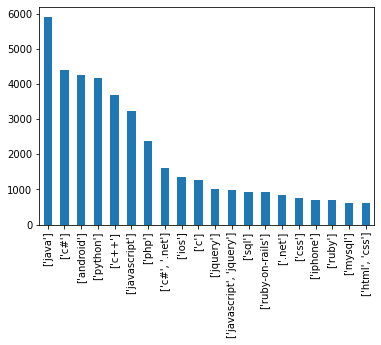

<Figure size 1440x1440 with 0 Axes>

In [38]:
# Plot a graph to view the number of each values for the Tags 
# (purpose to check if there is any unbalanced data)
uniq_value = df['Tags'].value_counts().head(20)
uniq_value.plot(kind='bar');
plt.xticks(rotation=90)
plt.figure(figsize=(20, 20))


In [15]:

# Removing the row of data which has the least frequent occur classes 

threshold = 500 # Anything that occurs less than this will be removed.
value_counts = df['Tags'].value_counts() # Entire DataFrame 
# get the values which are lower than 500
to_remove = value_counts[value_counts <= threshold].index

# convert to list 
list_val = to_remove.tolist()

# filter out the matched values
df = df[~df['Tags'].isin(list_val)]

df

,Text,Tags
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']
10,how do i connect to a database and loop over a...,['c#']
...,...,...
1262668,using lambda in default initializer gcc vs cla...,['c++']
1262834,stl list very bad performance it is supposed t...,['c++']
1262915,how to use a dict to subset a dataframe say i ...,['python']
1263065,is there a way to use itertools in python to c...,['python']


# Data Preprocessing

In [32]:
# Preprocessing function 
def preprocessText(text):
    stop_words = stopwords.words()
    
    # remove digits
    text = re.sub("\d+", '', text)  
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text
    

<>:5: DeprecationWarning: invalid escape sequence \d
<>:5: DeprecationWarning: invalid escape sequence \d
/var/folders/dn/hzq0yrf51jb3t_cht4tpk6yw0000gn/T/ipykernel_2163/2186213241.py:5: DeprecationWarning: invalid escape sequence \d
  text = re.sub("\d+", '', text)


In [33]:
# cleaned the text after applying the wordopt func
df["Text"]  = df["Text"].apply(preprocessText)

/var/folders/dn/hzq0yrf51jb3t_cht4tpk6yw0000gn/T/ipykernel_2163/3985241715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"]  = df["Text"].apply(preprocessText)


In [35]:
df_temp = df
df_temp

,Text,Tags
4,adding scripting functionality net application...,"['c#', '.net']"
5,use nested classes case working collection cla...,['c++']
6,homegrown consumption web services writing web...,['.net']
8,automatically update version number would like...,['c#']
10,connect database loop recordset whats simplest...,['c#']
...,...,...
1262668,using lambda default initializer gcc vs clang ...,['c++']
1262834,stl list bad performance supposed push back po...,['c++']
1262915,use dict subset dataframe say given dataframe ...,['python']
1263065,way use itertools python clean nested iteratio...,['python']


In [36]:
# Writing to a new file after preprocessing 
df_temp.to_csv('cleaned_new.csv', index=False)


# Read from new cleaned file (RUN START FROM HERE)

In [5]:
df2 = pd.read_csv('cleaned_new.csv',index_col=False)
df2

,Text,Tags
0,adding scripting functionality net application...,"['c#', '.net']"
1,use nested classes case working collection cla...,['c++']
2,homegrown consumption web services writing web...,['.net']
3,automatically update version number would like...,['c#']
4,connect database loop recordset whats simplest...,['c#']
...,...,...
42082,using lambda default initializer gcc vs clang ...,['c++']
42083,stl list bad performance supposed push back po...,['c++']
42084,use dict subset dataframe say given dataframe ...,['python']
42085,way use itertools python clean nested iteratio...,['python']


In [6]:
# Remove the ' symbols in tags using ast

df2['Tags'] = df2['Tags'].apply(lambda x: ast.literal_eval(x))
df2

,Text,Tags
0,adding scripting functionality net application...,"[c#, .net]"
1,use nested classes case working collection cla...,[c++]
2,homegrown consumption web services writing web...,[.net]
3,automatically update version number would like...,[c#]
4,connect database loop recordset whats simplest...,[c#]
...,...,...
42082,using lambda default initializer gcc vs clang ...,[c++]
42083,stl list bad performance supposed push back po...,[c++]
42084,use dict subset dataframe say given dataframe ...,[python]
42085,way use itertools python clean nested iteratio...,[python]


In [7]:
uniq_classes = df2['Tags'].value_counts()
print(uniq_classes)

[java]                  5894
[c#]                    4409
[android]               4270
[python]                4176
[c++]                   3689
[javascript]            3245
[php]                   2384
[c#, .net]              1619
[ios]                   1359
[c]                     1276
[jquery]                1015
[javascript, jquery]     989
[sql]                    928
[ruby-on-rails]          915
[.net]                   845
[css]                    761
[iphone]                 701
[ruby]                   686
[mysql]                  606
[html, css]              602
[asp.net]                581
[objective-c]            580
[java, android]          557
Name: Tags, dtype: int64


# Multilabel for Tags (Label encoding)

In [8]:
multilabel = MultiLabelBinarizer()

In [9]:
y = multilabel.fit_transform(df2['Tags'])


In [10]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
multilabel.classes_

array(['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html',
       'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby', 'ruby-on-rails', 'sql'],
      dtype=object)

In [12]:
pd.DataFrame(y, columns=multilabel.classes_)

,.net,android,asp.net,c,c#,c++,css,html,ios,iphone,java,javascript,jquery,mysql,objective-c,php,python,ruby,ruby-on-rails,sql
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42082,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42083,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
42085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# TFIDF (Feature extraction)

In [13]:

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df2['Text'])

# Train_Test Split 

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)


# Model Train

In [15]:
clf_sgd = SGDClassifier()
clf_lr = LogisticRegression(solver='lbfgs')
clf_svc = LinearSVC(C=2, penalty = 'l1', dual=False)

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix

# Function for jaccard score
def j_score(y_true, y_pred):
    jaccard = jaccard_score(y_true, y_pred, average='samples')
    return jaccard

    
# Function for hamming loss
def hamming_loss(y_true, y_pred):
    hl_num = np.sum(np.logical_xor(y_true, y_pred))
    hl_den = np.prod(y_true.shape)
    return hl_num/hl_den * 10

# Functon for accuracy score
def accuracy(y_true,y_pred):
    return accuracy_score(y_true, y_pred) * 100 # this gives us how often the algorithm predicted correctly

# Function to display classfication report
def classification(y_true,y_pred):
    return classification_report(y_true, y_pred)


def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print('Jacard score: {}'.format(j_score(y_test, y_pred)))
    print('Hamming loss: {}'.format(hamming_loss(y_test,y_pred)))
    print('Accuracy: {}'.format(accuracy(y_test,y_pred)))
    print(classification(y_test,y_pred))
    print('---------------------')

# Compare algorithm with ClassifierChain and different classfier model


In [17]:
# Compare with ClassifierChain
from sklearn.multioutput import ClassifierChain

for classifier in [clf_sgd, clf_lr, clf_svc]:
    chain =  ClassifierChain(classifier, order='random', random_state=0)
    chain.fit(X_train, y_train)
    y_pred = chain.predict(X_test)
    print_score(y_pred, classifier) 


Clf:  SGDClassifier
Jacard score: 0.6064979805179378
Hamming loss: 0.4083511522927061
Accuracy: 57.21073889284865
              precision    recall  f1-score   support

           0       0.78      0.17      0.28       520
           1       0.99      0.79      0.88       935
           2       0.76      0.37      0.50       106
           3       0.50      0.56      0.53       240
           4       0.74      0.49      0.59      1215
           5       0.87      0.54      0.67       747
           6       0.89      0.67      0.76       261
           7       0.55      0.17      0.26       129
           8       0.91      0.33      0.49       270
           9       0.70      0.42      0.53       136
          10       0.97      0.60      0.74      1333
          11       0.76      0.72      0.74       905
          12       0.86      0.60      0.71       415
          13       0.89      0.61      0.72       118
          14       1.00      0.16      0.28       105
          15       0.

/Users/admin/Desktop/Python/Jupyter envoriment/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/Desktop/Python/Jupyter envoriment/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/admin/Desktop/Python/Jupyter envoriment/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Clf:  LinearSVC
Jacard score: 0.7268353528153956
Hamming loss: 0.28254929912093135
Accuracy: 68.25849370396769
              precision    recall  f1-score   support

           0       0.33      0.39      0.35       520
           1       0.97      0.90      0.94       935
           2       0.78      0.53      0.63       106
           3       0.45      0.58      0.51       240
           4       0.71      0.69      0.70      1215
           5       0.79      0.68      0.73       747
           6       0.91      0.80      0.85       261
           7       0.48      0.30      0.37       129
           8       0.80      0.57      0.67       270
           9       0.61      0.63      0.62       136
          10       0.91      0.76      0.83      1333
          11       0.71      0.76      0.74       905
          12       0.83      0.67      0.74       415
          13       0.87      0.71      0.78       118
          14       0.71      0.55      0.62       105
          15       0.52 

In [18]:
# Train with the best algorithm (Linear SVC)
model = ClassifierChain(clf_svc)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_score(y_pred, clf_svc)

/Users/admin/Desktop/Python/Jupyter envoriment/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Clf:  LinearSVC
Jacard score: 0.7284390591589451
Hamming loss: 0.28308386790211454
Accuracy: 68.65051081016868
              precision    recall  f1-score   support

           0       0.57      0.27      0.37       520
           1       0.97      0.90      0.94       935
           2       0.75      0.47      0.58       106
           3       0.69      0.47      0.56       240
           4       0.75      0.61      0.67      1215
           5       0.76      0.72      0.74       747
           6       0.91      0.81      0.86       261
           7       0.48      0.30      0.37       129
           8       0.82      0.60      0.69       270
           9       0.74      0.56      0.64       136
          10       0.82      0.82      0.82      1333
          11       0.78      0.76      0.77       905
          12       0.84      0.72      0.77       415
          13       0.88      0.70      0.78       118
          14       0.50      0.59      0.54       105
          15       0.81 

# Testing model

In [39]:
test_data = ['''How to create a variable with ios and objective-c''']

In [40]:
xt = tfidf.transform(test_data)

In [41]:
model.predict(xt)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.]])

In [42]:
multilabel.inverse_transform(model.predict(xt))

[('ios', 'objective-c')]

# Export to pickle (Start here below no need to run)

In [23]:
# Multilabel to pickle
import pickle

with open("multilabel.pkl","wb") as f:
    pickle.dump(multilabel,f)

In [24]:
#TFIDF to pickle

with open("tfidf.pkl","wb") as f:
    pickle.dump(tfidf,f)

In [25]:
# Model (Linear SVC) to pickle
import pickle

with open("model.pkl","wb") as f:
    pickle.dump(model,f)

# Test Pickle

In [16]:
import pickle
vectorizer_saved = open("tfidf.pkl","rb")
loaded = pickle.load(vectorizer_saved)

user_input = ['''system.out.println.   
''']
user_text_x = loaded.transform(user_input)
#print(user_text_x)

In [17]:
f = open("model.pkl","rb")
model_saved = pickle.load(f)
pred_result = model_saved.predict(user_text_x)
print(pred_result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
out = open("multilabel.pkl","rb")
display = pickle.load(out)
print(display.inverse_transform(model_saved.predict(user_text_x)))

[('java',)]
